In [8]:
import numpy as np
import pandas as pd

input_data = np.asarray([
    [-3.73,56.33,995.1], [2.64,47.05,1012.5], [-8.40,47.50,1011.3], [2.94,54.33,1006.0], [-2.90,49.90,1006.3],
    [-8.98,53.72,1002.1], [1.20,58.60,1002.6], [1.60,50.73,1009.1], [-7.38,57.36,997.7], [-1.25,53.01,1000.4],
    [-4.74,52.79,998.4], [-0.61,47.48,1013.0], [-6.10,50.10,1004.3], [-6.46,54.87,996.4], [-3.22,47.29,1012.8],
    [-1.60,55.42,996.6], [2.30,56.60,1004.5], [1.12,52.95,1003.6], [-0.90,57.80,999.9], [-7.90,51.40,1002.6],
    [-0.70,50.10,1007.5], [2.53,49.02,1010.8], [-5.06,48.47,1008.5], [-3.10,53.60,997.5], [-5.63,57.86,997.8],
    [-6.90,52.85,1000.9], [-4.15,51.09,1002.6], [-1.99,51.50,1002.7], [1.21,47.68,1011.7], [-5.70,56.30,995.5],
    [-1.98,53.13,998.5], [1.09,49.93,1009.0], [1.72,58.42,1002.9], [-6.30,52.30,999.4], [0.70,57.70,1001.9],
    [-3.50,53.60,995.9], [1.38,48.06,1011.6], [-4.37,51.71,1001.1], [-3.09,58.45,998.5], [2.00,56.40,1003.9],
    [1.90,57.00,1003.3], [0.45,51.90,1004.9], [-8.25,51.80,1002.5], [-1.87,53.81,997.4], [-2.38,55.71,995.1],
    [-4.01,54.80,992.1], [0.88,53.37,1002.6], [-1.69,51.86,1002.1], [-4.57,52.14,999.6], [-0.20,58.40,1001.1],
])

lon_lat_data = input_data[:, 0:2]
qff_values = input_data[:, 2]

print("======Min, Max")
print(input_data[:,0].min(), input_data[:,0].max())
print(input_data[:,1].min(), input_data[:,1].max())
print(input_data[:,2].min(), input_data[:,2].max())
#print(lon_lat_data[:,0])

# definition of a 12Â° x 12Â° grid starting at 9Â°W / 47Â°N
resolution = 32.0
step = 1.0 / resolution
x0 = np.asarray([-9.0, 47.0], dtype=np.float64)
size = (int(12.0 / step), int(12.0 / step))
Xend1 = x0[0] + (step*size[0])
Xend2 = x0[1] + (step*size[1])

print("====== Map")
print(x0)
print(step)
print(size)
print(Xend1, Xend2)



======Min, Max
-8.98 2.94
47.05 58.6
992.1 1013.0
====== Map
[-9. 47.]
0.03125
(384, 384)
3.0 59.0


====field min, max
994.44226 1012.8178


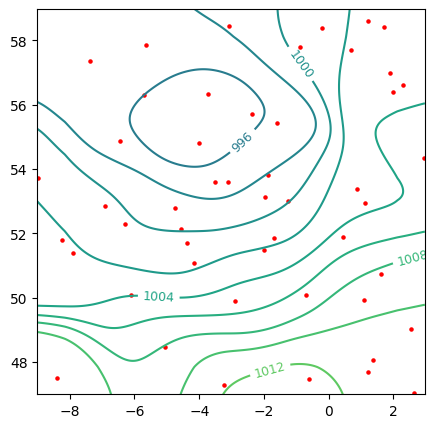

In [9]:
# calculate Barnes interpolation
from fastbarnes import interpolation
sigma = 1.0
field = interpolation.barnes(lon_lat_data, qff_values, sigma, x0, step, size)
print("====field min, max")
print(np.min(field), np.max(field))

# draw graphic with labeled contours and scattered sample points
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

gridX = np.arange(x0[0], x0[0]+size[1]*step, step)
gridY = np.arange(x0[1], x0[1]+size[0]*step, step)
#print(gridX)
#print(gridY)
levels = np.arange(976, 1026, 2)
cs = plt.contour(gridX, gridY, field, levels)
#plt.clabel(cs, levels[::2], fmt='%d', fontsize=9)
plt.clabel(cs, levels[::2], fmt='%d', fontsize=9)

plt.scatter(lon_lat_data[:, 0], lon_lat_data[:, 1], color='red', s=20, marker='.')

plt.show()